In [ ]:
!git clone https://github.com/Stability-AI/stablediffusion.git

Cloning into 'stablediffusion'...
remote: Enumerating objects: 574, done.
remote: Counting objects: 100% (304/304), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 574 (delta 244), reused 216 (delta 216), pack-reused 270
Receiving objects: 100% (574/574), 73.43 MiB | 16.55 MiB/s, done.
Resolving deltas: 100% (276/276), done.


In [ ]:
!pip install diffusers transformers accelerate scipy safetensors


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 114.2 MB/s eta 0:00:00


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

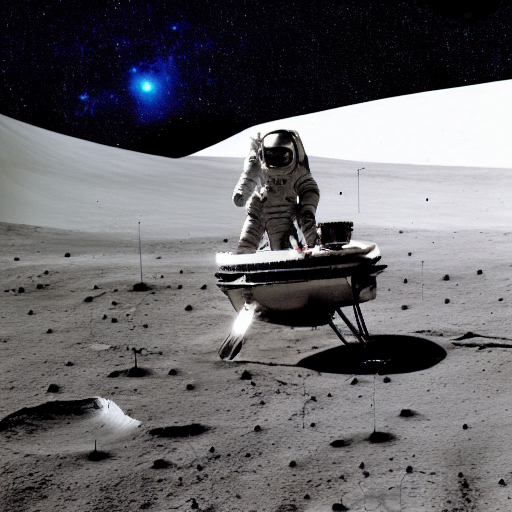

In [ ]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

model_id = "runwayml/stable-diffusion-v1-5"

scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a professional photograph of an astronaut riding a horse on moon"
image = pipe(prompt).images[0]

image.save("astronaut_rides_horse.png")
image


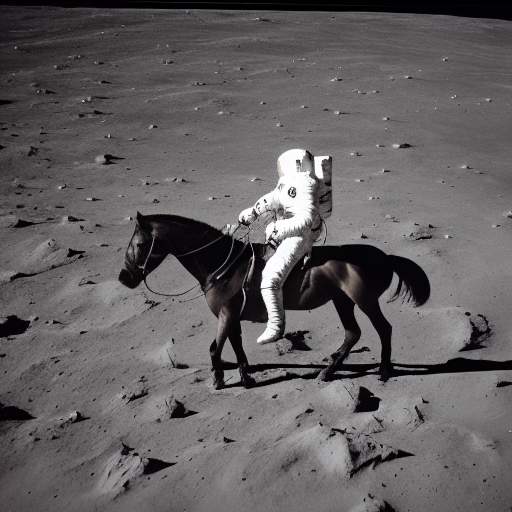

In [ ]:
image

In [ ]:
import torch
import requests
from PIL import Image
from diffusers import StableDiffusionDepth2ImgPipeline


pipe = StableDiffusionDepth2ImgPipeline.from_pretrained(
   "stabilityai/stable-diffusion-2-depth",
   torch_dtype=torch.float16,
).to("cuda")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
init_image = Image.open(requests.get(url, stream=True).raw)

prompt = "two tigers"
n_propmt = "bad, deformed, ugly, bad anotomy, ruff edges"
image = pipe(prompt=prompt, image=init_image, negative_prompt=n_propmt, strength=0.7).images[0]


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

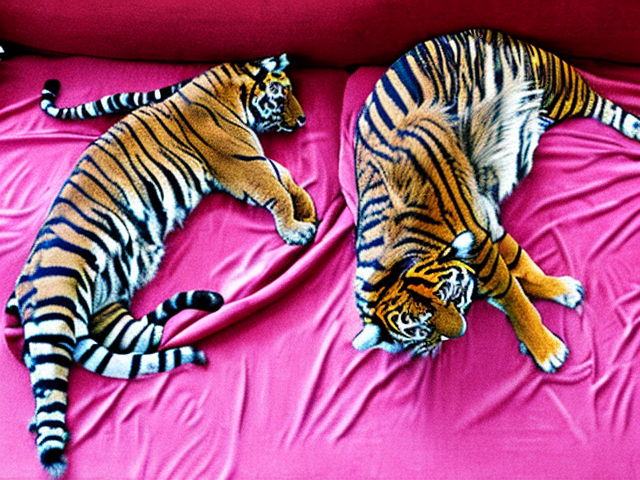

In [ ]:
image

In [ ]:
!python scripts/txt2img.py --prompt "a professional photograph of an astronaut riding a horse" --ckpt <path/to/768model.ckpt/> --config configs/stable-diffusion/v2-inference-v.yaml --H 768 --W 768

/bin/bash: line 1: path/to/768model.ckpt/: No such file or directory


In [ ]:
!git clone https://github.com/lllyasviel/ControlNet.git

Cloning into 'ControlNet'...
remote: Enumerating objects: 1350, done.
remote: Counting objects: 100% (435/435), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 1350 (delta 400), reused 371 (delta 371), pack-reused 915
Receiving objects: 100% (1350/1350), 122.37 MiB | 40.47 MiB/s, done.
Resolving deltas: 100% (612/612), done.


In [ ]:
!mkdir -p models

In [ ]:
!wget -P models "https://huggingface.co/lllyasviel/ControlNet/resolve/main/models/control_sd15_scribble.pth"


--2023-07-30 12:35:48--  https://huggingface.co/lllyasviel/ControlNet/resolve/main/models/control_sd15_scribble.pth
Resolving huggingface.co (huggingface.co)... 99.84.160.64, 99.84.160.43, 99.84.160.57, ...
Connecting to huggingface.co (huggingface.co)|99.84.160.64|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/f6/65/f665e553e8fd16131981a96c629e785939f08080bb3cbf8d2b7f5ddbd9e6100a/591bc5a70a167821634fc3d4870217d7501bd839615540d1cc158579390e9ad3?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27control_sd15_scribble.pth%3B+filename%3D%22control_sd15_scribble.pth%22%3B&Expires=1690974033&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTY5MDk3NDAzM319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy9mNi82NS9mNjY1ZTU1M2U4ZmQxNjEzMTk4MWE5NmM2MjllNzg1OTM5ZjA4MDgwYmIzY2JmOGQyYjdmNWRkYmQ5ZTYxMDBhLzU5MWJjNWE3MGExNjc4MjE2MzRmYzNkNDg3MDIxN2Q3NTAxYmQ4Mzk2MTU

In [ ]:
%cd /content

/content


In [ ]:
!git clone "https://github.com/lllyasviel/ControlNet/tree/main/annotator"

Cloning into 'annotator'...
fatal: repository 'https://github.com/lllyasviel/ControlNet/tree/main/annotator/' not found


In [ ]:
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 997.6 kB/s eta 0:00:00


In [ ]:
!pip install transformers

In [ ]:
!pip3 install open_clip_torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.6 MB/s eta 0:00:00


In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.2/294.2 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 6.1 MB/s eta 0:00:00
   

In [ ]:
!pip install pytorch-lightning==1.4.0rc0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 900.6/900.6 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 729.2/729.2 kB 57.5 MB/s eta 0:00:00


In [ ]:
!pip install omegaconf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144552 sha256=cc066612884da9d9685a4c64ee7e8c4743fd054efcd5612a19c580e9a6942976
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


In [ ]:
!pip install tensorrt

  Preparing metadata (setup.py) ... done
  Created wheel for tensorrt: filename=tensorrt-8.6.1-py2.py3-none-any.whl size=16972 sha256=92de080423db2ba60838b507b05d34283b8006e6773588120337e274968da333
  Stored in directory: /root/.cache/pip/wheels/6d/29/56/abdffd4c604f255b5254bef3f1c598ab7811ea020540599438
Successfully built tensorrt


In [ ]:
%cd /content/ControlNet


/content/ControlNet


In [ ]:
!python gradio_scribble2image_interactive.py

python3: can't open file '/content/gradio_scribble2image_interactive.py': [Errno 2] No such file or directory


In [ ]:
import os
current_path=os.getcwd()
print(current_path)

/content


In [ ]:
!python gradio_canny2image.py

2023-07-30 12:42:28.686235: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
logging improved.
Traceback (most recent call last):
  File "/content/ControlNet/gradio_canny2image.py", line 11, in <module>
    from pytorch_lightning import seed_everything
  File "/usr/local/lib/python3.10/dist-packages/pytorch_lightning/__init__.py", line 20, in <module>
    from pytorch_lightning import metrics  # noqa: E402
  File "/usr/local/lib/python3.10/dist-packages/pytorch_lightning/metrics/__init__.py", line 15, in <module>
    from pytorch_lightning.metrics.classification import (  # noqa: F401
  File "/usr/local/lib/python3.10/dist-packages/pytorch_lightning/metrics/classification/__init__.py", line 14, in <module>
    from pytorch_lightning.metrics.classification.accuracy import Accuracy  # noqa: F401
  File "/usr/local/lib/python3.10/dist-packages/pytorch_lightning/metrics/classification/accuracy.py", line 18, in <module>
    from pytorch_lightni